#### Imports

In [37]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.set_printoptions(3)

In [38]:
FILE_PATH = "data/train.csv"

### Lightweight Data Wrangling

In [39]:
data = pd.read_csv(FILE_PATH).iloc[:, 1:]  # removing the first Id column

### Dimensions

In [40]:
len(data.columns), len(data)

(80, 1460)

### Response to predict

(array([ 34900., 129975., 163000., 214000., 755000.]), 0)

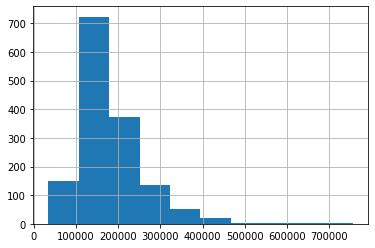

In [41]:
y_vec = data["SalePrice"].values
plt.hist(y_vec)
plt.grid()
np.quantile(y_vec, [0.0, 0.25, 0.5, 0.75, 1.0]), np.isnan(y_vec).sum()

12.105816833620844

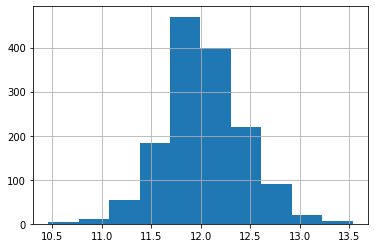

In [42]:
plt.hist(np.log(y_vec))
plt.grid()
np.log(y_vec.mean())

12.024050901109383


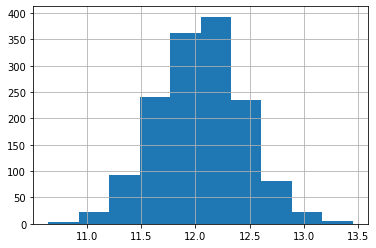

In [43]:
log_y = np.log(y_vec)
mean = log_y.mean()
print(mean)
std = log_y.std()
samples = np.random.randn(len(data))
synthetic = std * samples + mean
plt.hist(synthetic)
plt.grid()

- no pathological values for y
- log transforming the response gives us a nicely normal distribution to predict

### Column types

In [44]:
n_cols = len(data.columns)
numerical_cols = [
    col
    for col in data.columns
    if (
        "int64" == data.loc[:, col].dtype
        or "float64" == data.loc[:, col].dtype
    )
]
len(numerical_cols), numerical_cols

(37,
 ['MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'])

In [45]:
data.loc[:, numerical_cols].isna().sum(0)

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

cardinality 15
MSSubClass embedding
[ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]
0 NaN values removed
MSSubClass log normalized


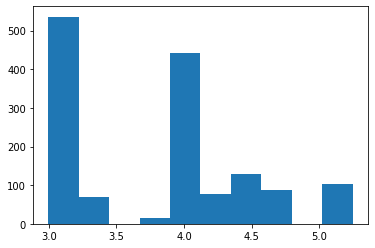

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 1


you picked 1
cardinality 111
259 NaN values removed
LotFrontage log normalized


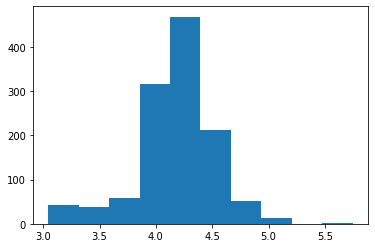

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 3


you picked 3
cardinality 1073
0 NaN values removed
LotArea log normalized


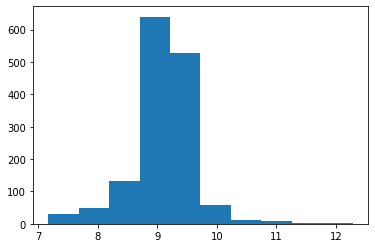

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 2


you picked 2
cardinality 10
OverallQual embedding
[ 1  2  3  4  5  6  7  8  9 10]
0 NaN values removed
OverallQual log normalized


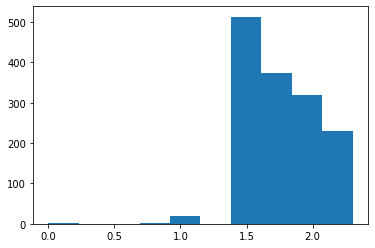

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 1


you picked 1
cardinality 9
OverallCond embedding
[1 2 3 4 5 6 7 8 9]
0 NaN values removed
OverallCond log normalized


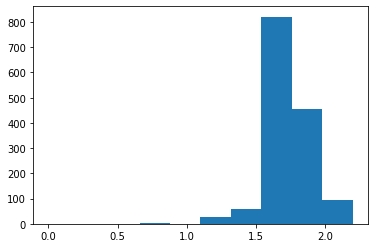

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 2


you picked 2
cardinality 112
0 NaN values removed
YearBuilt log normalized


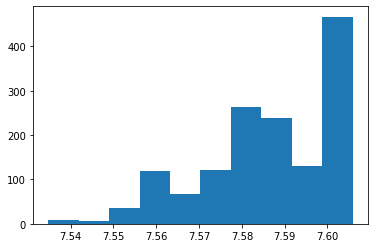

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 1


you picked 1
cardinality 61
0 NaN values removed
YearRemodAdd log normalized


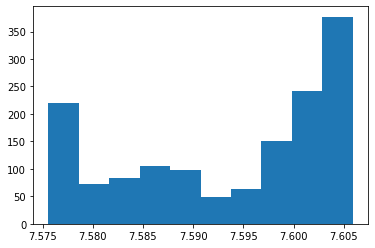

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 1


you picked 1
cardinality 328
8 NaN values removed
MasVnrArea not normalized
0.0


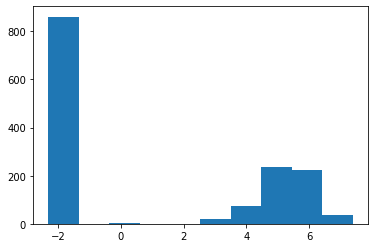

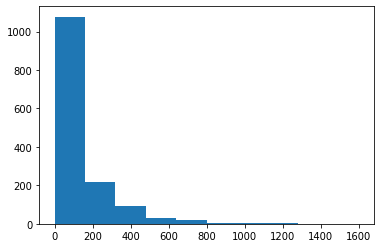

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 4


you picked 4
cardinality 637
0 NaN values removed
BsmtFinSF1 not normalized
0


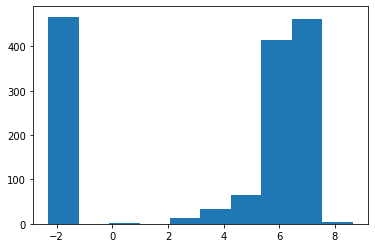

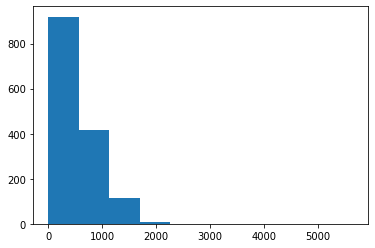

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 4


you picked 4
cardinality 144
0 NaN values removed
BsmtFinSF2 not normalized
0


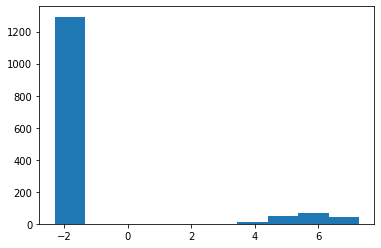

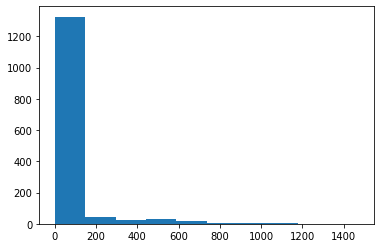

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 4


you picked 4
cardinality 780
0 NaN values removed
BsmtUnfSF not normalized
0


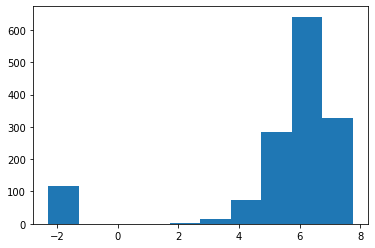

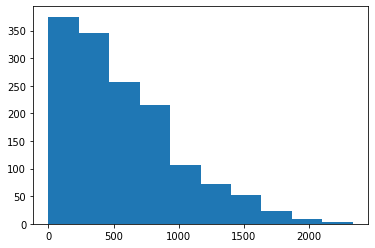

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 1


you picked 1
cardinality 721
0 NaN values removed
TotalBsmtSF not normalized
0


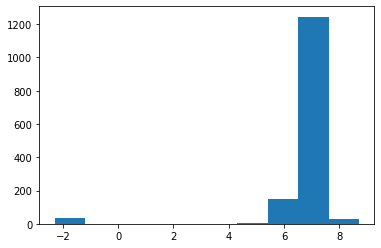

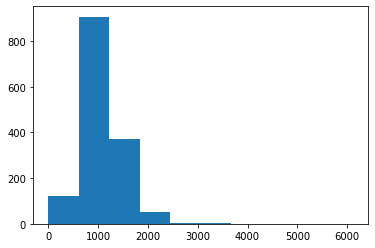

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 6


skipping
you picked 6
cardinality 753
0 NaN values removed
1stFlrSF log normalized


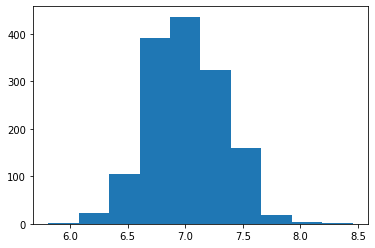

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 2


you picked 2
cardinality 417
0 NaN values removed
2ndFlrSF not normalized
0


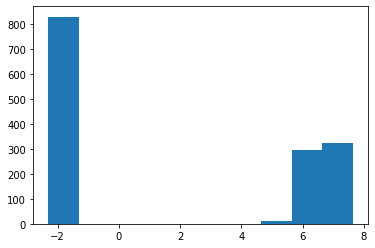

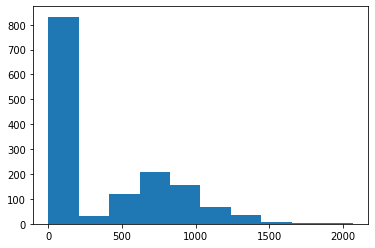

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 4


you picked 4
cardinality 24
0 NaN values removed
LowQualFinSF not normalized
0


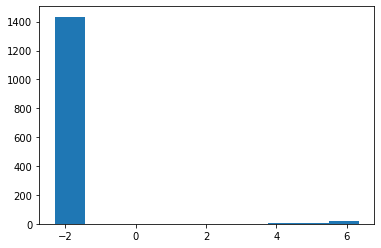

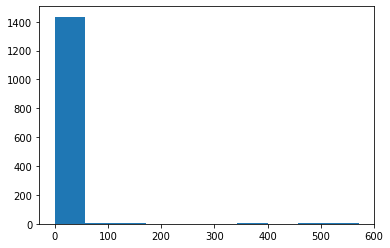

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 6


skipping
you picked 6
cardinality 861
0 NaN values removed
GrLivArea log normalized


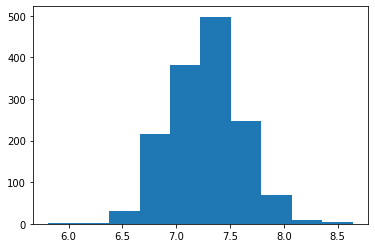

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 2


you picked 2
cardinality 4
BsmtFullBath embedding
[0 1 2 3]
0 NaN values removed
BsmtFullBath not normalized
0


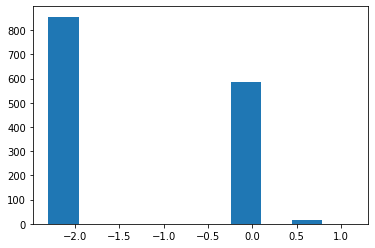

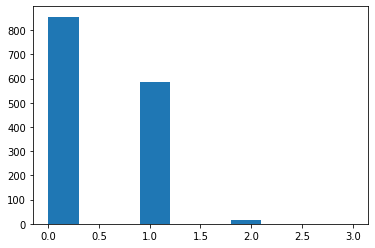

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 1


you picked 1
cardinality 3
BsmtHalfBath embedding
[0 1 2]
0 NaN values removed
BsmtHalfBath not normalized
0


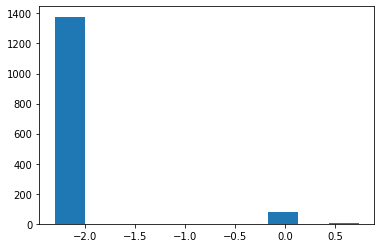

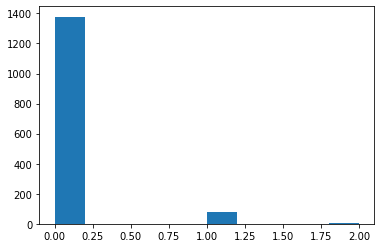

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 6


skipping
you picked 6
cardinality 4
FullBath embedding
[0 1 2 3]
0 NaN values removed
FullBath not normalized
0


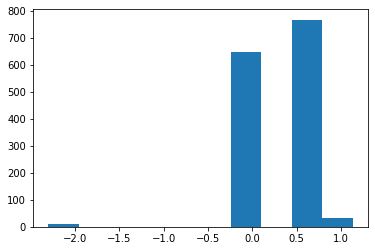

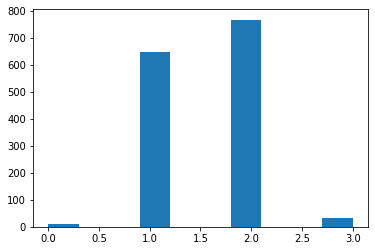

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 5


you picked 5
cardinality 3
HalfBath embedding
[0 1 2]
0 NaN values removed
HalfBath not normalized
0


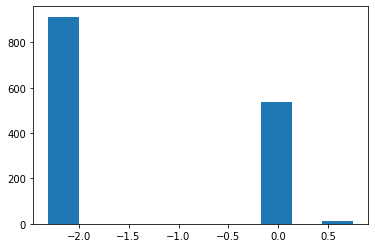

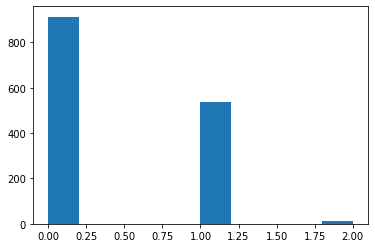

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 5


you picked 5
cardinality 8
BedroomAbvGr embedding
[0 1 2 3 4 5 6 8]
0 NaN values removed
BedroomAbvGr not normalized
0


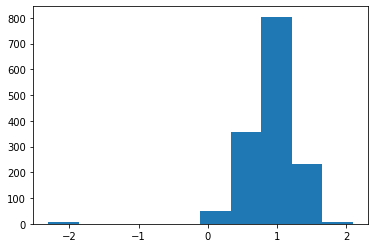

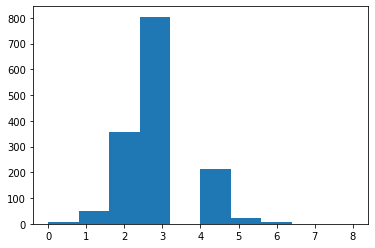

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 1


you picked 1
cardinality 4
KitchenAbvGr embedding
[0 1 2 3]
0 NaN values removed
KitchenAbvGr not normalized
0


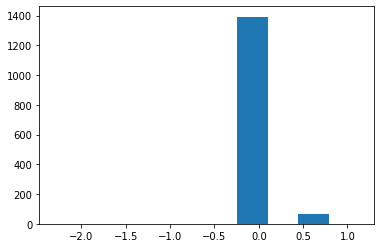

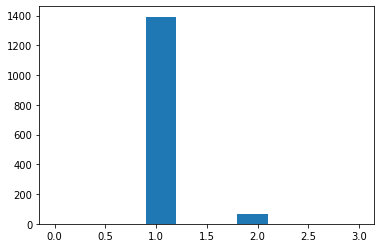

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 6


skipping
you picked 6
cardinality 12
TotRmsAbvGrd embedding
[ 2  3  4  5  6  7  8  9 10 11 12 14]
0 NaN values removed
TotRmsAbvGrd log normalized


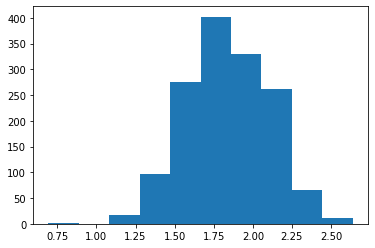

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 2


you picked 2
cardinality 4
Fireplaces embedding
[0 1 2 3]
0 NaN values removed
Fireplaces not normalized
0


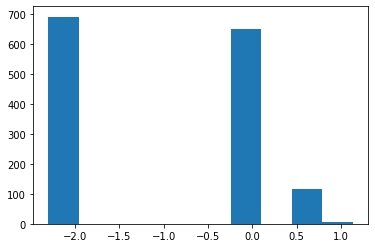

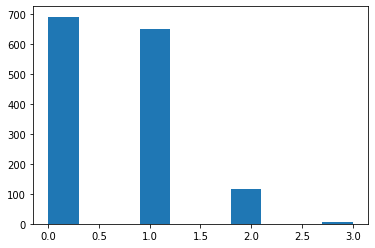

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 1


you picked 1
cardinality 98
81 NaN values removed
GarageYrBlt log normalized


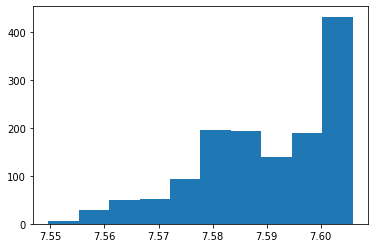

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 3


you picked 3
cardinality 5
GarageCars embedding
[0 1 2 3 4]
0 NaN values removed
GarageCars not normalized
0


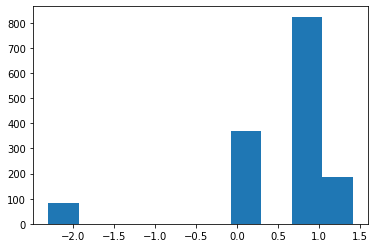

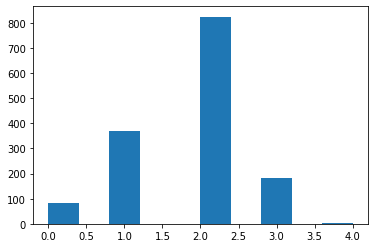

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 1


you picked 1
cardinality 441
0 NaN values removed
GarageArea not normalized
0


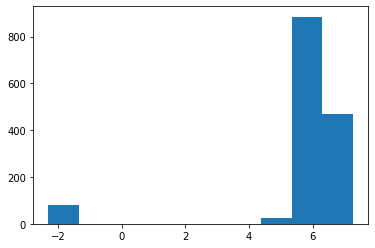

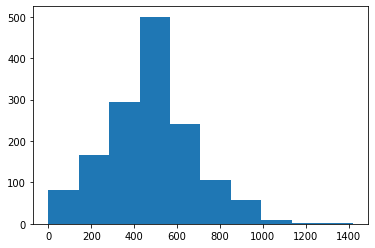

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 1


you picked 1
cardinality 274
0 NaN values removed
WoodDeckSF not normalized
0


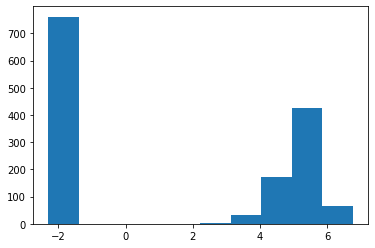

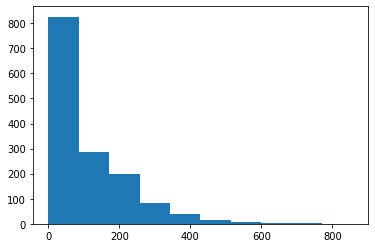

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 4


you picked 4
cardinality 202
0 NaN values removed
OpenPorchSF not normalized
0


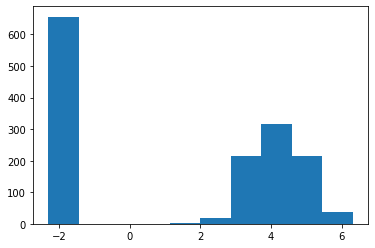

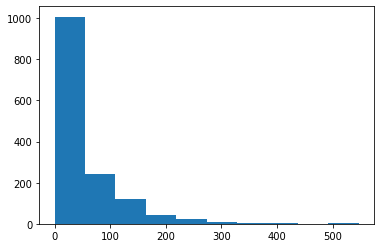

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 4


you picked 4
cardinality 120
0 NaN values removed
EnclosedPorch not normalized
0


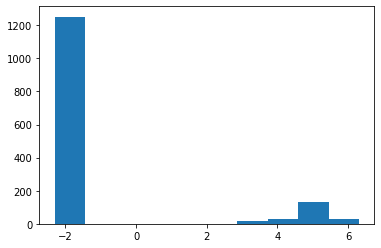

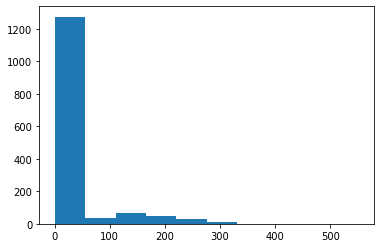

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 4


you picked 4
cardinality 20
3SsnPorch embedding
[  0  23  96 130 140 144 153 162 168 180 182 196 216 238 245 290 304 320
 407 508]
0 NaN values removed
3SsnPorch not normalized
0


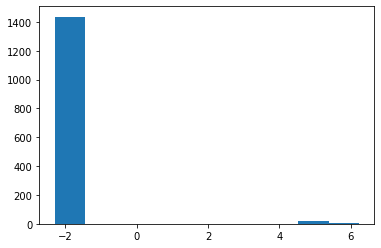

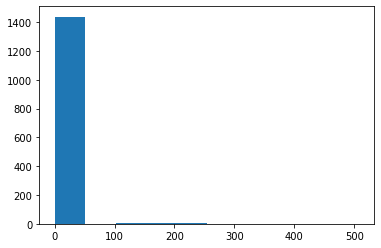

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 4


you picked 4
cardinality 76
0 NaN values removed
ScreenPorch not normalized
0


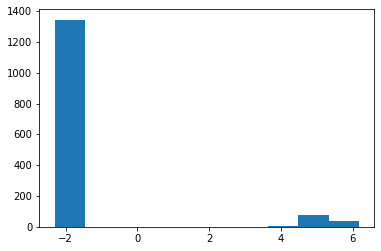

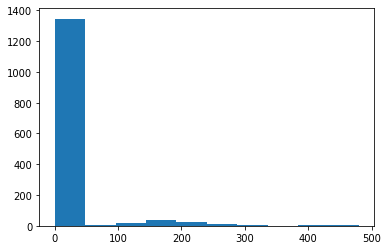

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 6


skipping
you picked 6
cardinality 8
PoolArea embedding
[  0 480 512 519 555 576 648 738]
0 NaN values removed
PoolArea not normalized
0


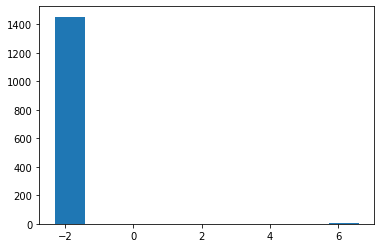

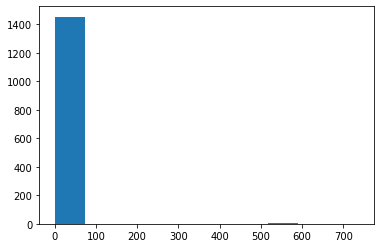

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 4


you picked 4
cardinality 21
0 NaN values removed
MiscVal not normalized
0


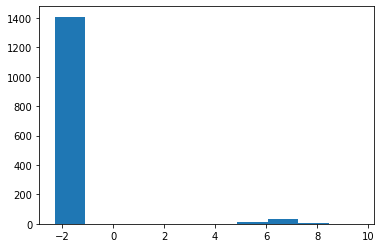

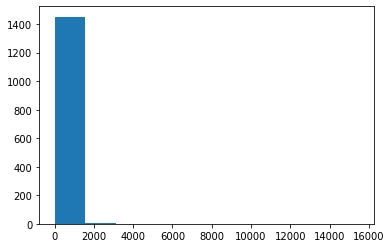

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 4


you picked 4
cardinality 12
MoSold embedding
[ 1  2  3  4  5  6  7  8  9 10 11 12]
0 NaN values removed
MoSold log normalized


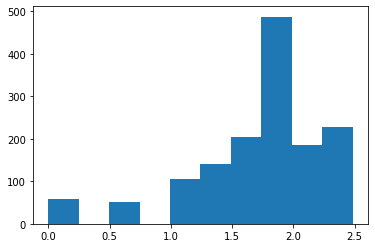

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 1


you picked 1
cardinality 5
YrSold embedding
[2006 2007 2008 2009 2010]
0 NaN values removed
YrSold log normalized


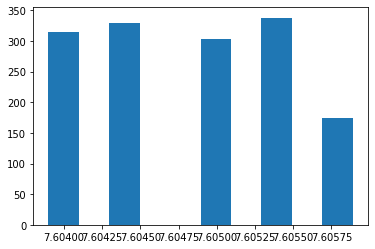

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 5


you picked 5
cardinality 663
0 NaN values removed
SalePrice log normalized


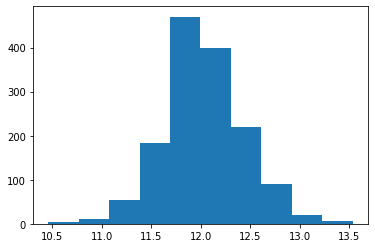

choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed 6


skipping
you picked 6
[('MSSubClass', 'scale'), ('LotFrontage', 'isna'), ('LotArea', 'lognorm'), ('OverallQual', 'scale'), ('OverallCond', 'lognorm'), ('YearBuilt', 'scale'), ('YearRemodAdd', 'scale'), ('MasVnrArea', 'is0'), ('BsmtFinSF1', 'is0'), ('BsmtFinSF2', 'is0'), ('BsmtUnfSF', 'scale'), ('1stFlrSF', 'lognorm'), ('2ndFlrSF', 'is0'), ('GrLivArea', 'lognorm'), ('BsmtFullBath', 'scale'), ('FullBath', 'embed'), ('HalfBath', 'embed'), ('BedroomAbvGr', 'scale'), ('TotRmsAbvGrd', 'lognorm'), ('Fireplaces', 'scale'), ('GarageYrBlt', 'isna'), ('GarageCars', 'scale'), ('GarageArea', 'scale'), ('WoodDeckSF', 'is0'), ('OpenPorchSF', 'is0'), ('EnclosedPorch', 'is0'), ('3SsnPorch', 'is0'), ('PoolArea', 'is0'), ('MiscVal', 'is0'), ('MoSold', 'scale'), ('YrSold', 'embed')]


In [46]:
numeric_transforms = []
for ncol in numerical_cols:
    arr = data.loc[:, ncol].values
    n_uniques = len(np.unique(arr))
    hist = False
    embed = False
    print(f"cardinality {n_uniques}")
    if n_uniques <= 20:
        print(ncol, "embedding")
        print(np.unique(arr))
    n_nans = np.isnan(arr).sum()
    print(f"{n_nans} NaN values removed")
    arr = arr[~np.isnan(arr)]
    if arr.min() > 0:
        print(ncol, "log normalized")
        arr = np.log(arr)
        hist = True
    else:
        print(ncol, "not normalized")
        print(arr.min())
        hist = True
        plt.figure()
        plt.hist(np.log(arr + arr.min() + 1e-1))
        plt.show()
        plt.close()
    if hist:
        plt.figure()
        plt.hist(arr)
        plt.show()
        plt.close()
    category = None
    while True:
        category = int(
            input(
                "choice? 1: scale, 2: logstd, 3: isna, 4: is0, 5: embed, 6: skip"
            )
        )
        if category in list(range(1, 7)):
            break
        else:
            print("please enter an integer 1, ..., 6")
    if category == 1:
        numeric_transforms.append((ncol, "scale"))
    elif category == 2:
        numeric_transforms.append((ncol, "lognorm"))
    elif category == 3:
        numeric_transforms.append((ncol, "isna"))
    elif category == 4:
        numeric_transforms.append((ncol, "is0"))
    elif category == 5:
        numeric_transforms.append((ncol, "embed"))
    elif category == 6:
        print("skipping")
    else:
        print("unreachable")
    print(f"you picked {category}")
print(numeric_transforms)

In [47]:
transforms = numeric_transforms
for col in data.columns:
    datacol = data[col]
    if datacol.dtype == "object":
        print(f"col name {col}")
        print(f"num NaN {datacol.isna().sum()}")
        unique_vals = datacol.astype(str).unique()
        print(unique_vals)
        if len(unique_vals) <= 4:
            transforms.append((col, "embed"))
            print("adding")
        print("*" * 15)

col name MSZoning
num NaN 0
['RL' 'RM' 'C (all)' 'FV' 'RH']
***************
col name Street
num NaN 0
['Pave' 'Grvl']
adding
***************
col name Alley
num NaN 1369
['nan' 'Grvl' 'Pave']
adding
***************
col name LotShape
num NaN 0
['Reg' 'IR1' 'IR2' 'IR3']
adding
***************
col name LandContour
num NaN 0
['Lvl' 'Bnk' 'Low' 'HLS']
adding
***************
col name Utilities
num NaN 0
['AllPub' 'NoSeWa']
adding
***************
col name LotConfig
num NaN 0
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
***************
col name LandSlope
num NaN 0
['Gtl' 'Mod' 'Sev']
adding
***************
col name Neighborhood
num NaN 0
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
***************
col name Condition1
num NaN 0
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
******

In [48]:
import json
import os

with open(os.path.join("data", "transforms"), "w") as jfile:
    json.dump(transforms, jfile)